<a href="https://colab.research.google.com/github/AlexyNat/ml/blob/main/lab3_2_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3

# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Вариант
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$


# 1 Сгенерировать с использованием библиотеки pandas csv файл

## Генерирование данных pandas

In [75]:
import pandas as pd
import numpy as np

data = pd.DataFrame({'x1' : np.linspace(1, 10, 450), 'x2': np.linspace(0, 1, 450)})
data['y'] = np.sin(data.x1) / (1 + np.exp(-2 * data.x2))
print(data.head())

         x1        x2         y
0  1.000000  0.000000  0.420735
1  1.020045  0.002227  0.427015
2  1.040089  0.004454  0.433145
3  1.060134  0.006682  0.439125
4  1.080178  0.008909  0.444950


# Создание CSV

In [76]:
data.to_csv(path_or_buf='data.csv', index=False)

# 2 Открыть файл с использованием библиотеки pandas и построить графики

In [77]:
data = pd.read_csv('data.csv')
print(data.head())

         x1        x2         y
0  1.000000  0.000000  0.420735
1  1.020045  0.002227  0.427015
2  1.040089  0.004454  0.433145
3  1.060134  0.006682  0.439125
4  1.080178  0.008909  0.444950


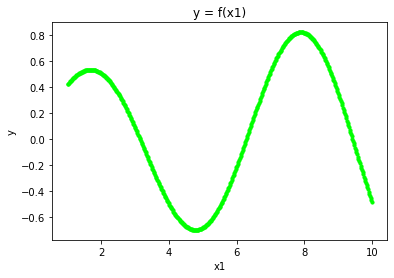

In [78]:
import matplotlib.pyplot as plt

plt.scatter(data.x1, data.y, s=10,color=(0, 1, 0))
plt.title("y = f(x1)")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

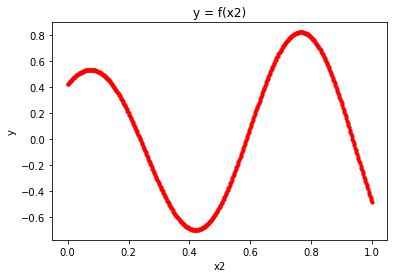

In [79]:
plt.scatter(data.x2, data.y, s=10,color=(1, 0, 0))
plt.title("y = f(x2)")
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

# 3 Вывести для каждого столбца: среднее, минимальное и максимальное значения.

In [84]:
print('x1: среднее {}, минимальное {}, максимальное {}'.format(data.x1.mean(), data.x1.min(), data.x1.max()))
print('x2: среднее {}, минимальное {}, максимальное {}'.format(data.x2.mean(), data.x2.min(), data.x2.max()))
print('y: среднее {}, минимальное {}, максимальное {}'.format(data.y.mean(), data.y.min(), data.y.max()))

x1: среднее 5.5, минимальное 1.0, максимальное 10.0
x2: среднее 0.4999999999999999, минимальное 0.0, максимальное 1.0
y: среднее 0.10548035639070855, минимальное -0.6968401753298459, максимальное 0.8216390704513048


# 4 Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднего $x_1$ или $x_2$ меньше среднее $x_2$


## Создаем новый DataFrame из старого

In [90]:
data1 = data[(data.x1 < data.x1.mean()) | (data.x2 < data.x2.mean())]
print(data1.head())
print(data1.tail())

         x1        x2         y
0  1.000000  0.000000  0.420735
1  1.020045  0.002227  0.427015
2  1.040089  0.004454  0.433145
3  1.060134  0.006682  0.439125
4  1.080178  0.008909  0.444950
           x1        x2         y
220  5.409800  0.489978 -0.557327
221  5.429844  0.492205 -0.548521
222  5.449889  0.494432 -0.539470
223  5.469933  0.496659 -0.530177
224  5.489978  0.498886 -0.520645


## Сохраняем в csv формате

In [91]:
data1.to_csv(path_or_buf='data1.csv', index=False)

# 5 С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

In [95]:
data = pd.read_csv('data1.csv')
print(data.head())

         x1        x2         y
0  1.000000  0.000000  0.420735
1  1.020045  0.002227  0.427015
2  1.040089  0.004454  0.433145
3  1.060134  0.006682  0.439125
4  1.080178  0.008909  0.444950


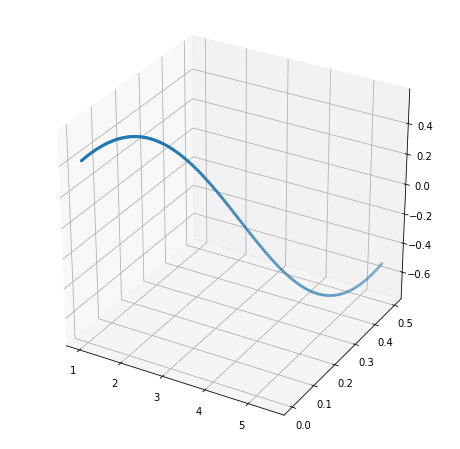

In [98]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.x1, data.x2, data.y, s=5)